<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Time_Series_(SARIMAX)_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis Model

In [1]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 967 (delta 20), reused 7 (delta 7), pack-reused 920 (from 2)
Receiving objects: 100% (967/967), 11.38 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (337/337), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/DS4002/Project_2/DATA/impute_df.csv")

In [9]:
df.head()

,UTC Timestamp (Interval Ending),MISO Total Actual Load (MW),Indianapolis Temperature (Fahrenheit),Minneapolis Temperature (Fahrenheit),New Orleans International Airport Temperature (Fahrenheit),MISO Total Wind Generation (MW),GDP
0,2021-02-10 06:00:00,77859.97,19.9,0.0,64.0,5376.71,3.478772e+06
1,2021-02-10 07:00:00,76211.10,19.9,-0.9,63.0,5019.58,3.478798e+06
2,2021-02-10 08:00:00,75295.06,19.9,-4.0,63.0,4895.51,3.478824e+06
3,2021-02-10 09:00:00,75164.21,19.9,-2.0,63.0,4747.13,3.478850e+06
4,2021-02-10 10:00:00,75743.83,19.9,-2.0,62.1,4341.06,3.478876e+06


## Time-Series Model

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [11]:
y = df["MISO Total Actual Load (MW)"]
X = df[["Indianapolis Temperature (Fahrenheit)", "Minneapolis Temperature (Fahrenheit)", "MISO Total Wind Generation (MW)", "New Orleans International Airport Temperature (Fahrenheit)", "GDP"]]

# replace infinite and NaN values
#X = X.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
#y = y.fillna(method='ffill')



In [12]:
# train-test split
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# fit model
sarimax_model = SARIMAX(y_train, exog=X_train, order=(2,1,2), seasonal_order=(1,1,1,24))
sarimax_fit = sarimax_model.fit()

# predict
sarimax_pred = sarimax_fit.predict(start=len(y_train), end=len(y)-1, exog=X_test)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Test Metrics

In [13]:
from sklearn.metrics import mean_squared_error

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, sarimax_pred))
print(f"Time Series RMSE: {rmse}")

Time Series RMSE: 12686.24688062083


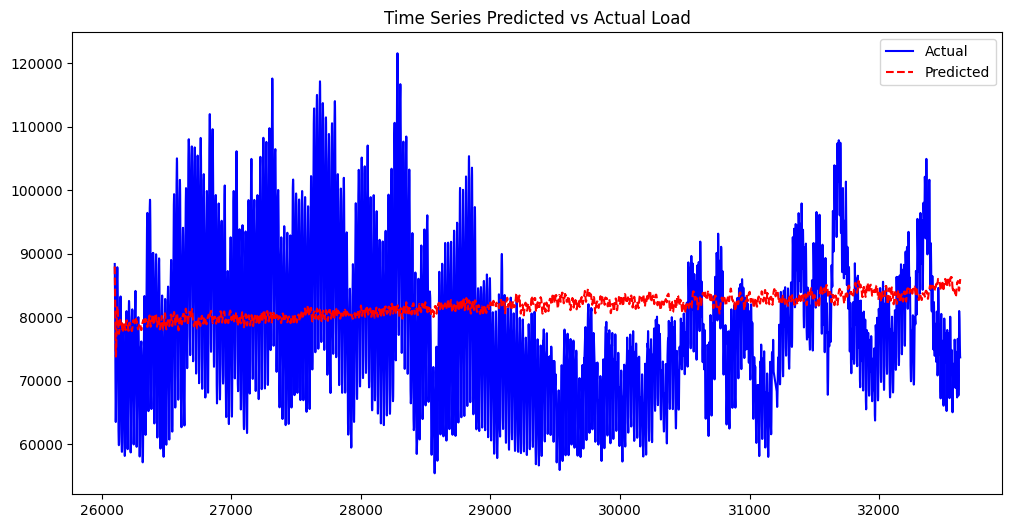

In [15]:
# plot of actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, sarimax_pred, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.title("Time Series Predicted vs Actual Load")
plt.show()